# Algum fabricante está relacionado ao maior número de ocorrências?

Cessna Aircraft é o fabricante com mais registro de ocorrências

# Há alguma relação entre o ano de fabricação das aeronaves com as ocorrências? 
As aeronaves com mais registros de ocorrências foram fabricadas recentemente (2007-2013);

# O maior número de ocorrências está relacionado a quais tipos de Aeronaves?
O modelo PA34 é o que tem mais ocorrências e o modelo IPAN o que registrou mais acidentes.

O motor pistão e aeronaves mono e bimotores são as que registraram mais ocorrências.

In [15]:
import pandas as pd
import numpy as np
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
aeronaves_filtradas=pd.read_csv('../dados/aeronave_filtrada.csv', sep = ',')
ocorrencias_filtradas=pd.read_csv('../dados/ocorrencias_filtradas.csv', sep = ',')

In [8]:
aeronaves_filtradas

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,45331,PRTKB,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DESCIDA,NENHUM,0
1,45332,PTUDD,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,SUBSTANCIAL,0
2,45333,PTGOO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,ESPECIALIZADA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,SUBSTANCIAL,0
3,45334,PRMHX,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,CORRIDA APÓS POUSO,LEVE,0
4,45390,PTUEW,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,FORA DE AERODROMO,FORA DE AERODROMO,ESPECIALIZADA,SUBSTANCIAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,80463,PRHMB,AVIÃO,CIRRUS DESIGN,SR22,SR22,PISTÃO,MONOMOTOR,1542,PARTICULAR,ANGRA DOS REIS,SÍLVIO NAME JÚNIOR,CRUZEIRO,NENHUM,0
5231,80465,PRYRW,***,***,***,***,***,***,0,REGULAR,DEPUTADO LUÍS EDUARDO MAGALHÃES,SANTOS DUMONT,CRUZEIRO,NENHUM,0
5232,80467,PRGXM,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,REGULAR,ORLANDO BEZERRA DE MENEZES,GOVERNADOR ANDRÉ FRANCO MONTORO,SUBIDA,LEVE,0
5233,80468,PRGIH,AVIÃO,BOEING COMPANY,737-76N,B737,JATO,BIMOTOR,70080,REGULAR,SANTOS DUMONT,DEPUTADO LUÍS EDUARDO MAGALHÃES,TÁXI,NENHUM,0


In [11]:
ocorrencias_filtradas

,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,Dia,Mes,Ano
0,52242,INCIDENTE,PORTO ALEGRE,RS,SBPA,05/01/2012,20:27:00,5,1,2012
1,45331,ACIDENTE,GUARULHOS,SP,SBGR,06/01/2012,13:44:00,6,1,2012
2,45333,ACIDENTE,VIAMÃO,RS,****,06/01/2012,13:00:00,6,1,2012
3,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,06/01/2012,17:00:00,6,1,2012
4,45407,ACIDENTE,SÃO SEPÉ,RS,****,06/01/2012,16:30:00,6,1,2012
...,...,...,...,...,...,...,...,...,...,...
5161,80458,ACIDENTE,JATAÍ,GO,####,30/12/2021,20:30:00,30,12,2021
5162,80452,ACIDENTE,MARACAÍ,SP,*****,31/12/2021,09:30:00,31,12,2021
5163,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,31/12/2021,11:59:00,31,12,2021
5164,80460,INCIDENTE,CURITIBA,PR,SBBI,31/12/2021,15:12:00,31,12,2021


# Unindo dados das duas tabelas: aeronaves e ocorrências.

In [17]:
aeronaves_ocorrencias = pd.merge(aeronaves_filtradas, ocorrencias_filtradas, left_on=['codigo_ocorrencia2'], right_on=['codigo_ocorrencia1'])
aeronaves_ocorrencias

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_ano_fabricacao,...,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,Dia,Mes,Ano
0,45331,PRTKB,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,2001.0,...,45331,ACIDENTE,GUARULHOS,SP,SBGR,06/01/2012,13:44:00,6,1,2012
1,45332,PTUDD,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,1987.0,...,45332,ACIDENTE,VIAMÃO,RS,****,09/01/2012,13:30:00,9,1,2012
2,45333,PTGOO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,1976.0,...,45333,ACIDENTE,VIAMÃO,RS,****,06/01/2012,13:00:00,6,1,2012
3,45334,PRMHX,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,2008.0,...,45334,INCIDENTE,BELÉM,PA,SBBE,08/01/2012,19:12:00,8,1,2012
4,45390,PTUEW,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,1989.0,...,45390,ACIDENTE,CACHOEIRA DOURADA,GO,****,20/01/2012,21:00:00,20,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,80461,PRAQI,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,23000,2013.0,...,80461,INCIDENTE,MARINGÁ,PR,SBMG,24/12/2021,03:30:00,24,12,2021
5024,80463,PRHMB,AVIÃO,CIRRUS DESIGN,SR22,SR22,PISTÃO,MONOMOTOR,1542,2004.0,...,80463,INCIDENTE,MARINGÁ,PR,SBMG,28/12/2021,16:11:00,28,12,2021
5025,80467,PRGXM,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,2013.0,...,80467,INCIDENTE,PETROLINA,PE,SBPL,31/12/2021,20:30:00,31,12,2021
5026,80468,PRGIH,AVIÃO,BOEING COMPANY,737-76N,B737,JATO,BIMOTOR,70080,2004.0,...,80468,INCIDENTE,SALVADOR,BA,SBSV,26/12/2021,16:56:00,26,12,2021


In [39]:
aeronaves_ocorrencias[aeronaves_ocorrencias['ocorrencia_classificacao'] == 'INCIDENTE'].aeronave_fatalidades_total.value_counts()

0    2703
Name: aeronave_fatalidades_total, dtype: int64

In [38]:
aeronaves_ocorrencias[aeronaves_ocorrencias['ocorrencia_classificacao'] == 'INCIDENTE GRAVE'].aeronave_fatalidades_total.value_counts()

0    698
Name: aeronave_fatalidades_total, dtype: int64

In [40]:
aeronaves_ocorrencias[aeronaves_ocorrencias['ocorrencia_classificacao'] == 'ACIDENTE'].aeronave_fatalidades_total.value_counts()

0     1257
1      192
2       99
3       25
4       23
5       19
6        5
8        3
7        3
10       1
Name: aeronave_fatalidades_total, dtype: int64

# Tipos de Veículos

In [18]:
aeronaves_ocorrencias.aeronave_tipo_veiculo.value_counts()

AVIÃO          4076
HELICÓPTERO     540
ULTRALEVE       294
***              81
PLANADOR         17
ANFÍBIO          12
TRIKE             4
DIRIGÍVEL         2
BALÃO             1
HIDROAVIÃO        1
Name: aeronave_tipo_veiculo, dtype: int64

In [19]:
labels = aeronaves_ocorrencias.aeronave_tipo_veiculo.value_counts().index.tolist()
# Utilizando as labels com maior volumetria de dados e categorizando as demais como outros.
labels = [labels[0], labels[1], labels[2], 'OUTRO']
labels

['AVIÃO', 'HELICÓPTERO', 'ULTRALEVE', 'OUTRO']

In [20]:
aeronaves_ocorrencias.loc[~aeronaves_ocorrencias.aeronave_tipo_veiculo.isin(labels), 'aeronave_tipo_veiculo'] = 'OUTRO'
aeronaves_ocorrencias.aeronave_tipo_veiculo.value_counts()

AVIÃO          4076
HELICÓPTERO     540
ULTRALEVE       294
OUTRO           118
Name: aeronave_tipo_veiculo, dtype: int64

## Panorama da Classificação das ocorrências por Tipo de Veículo


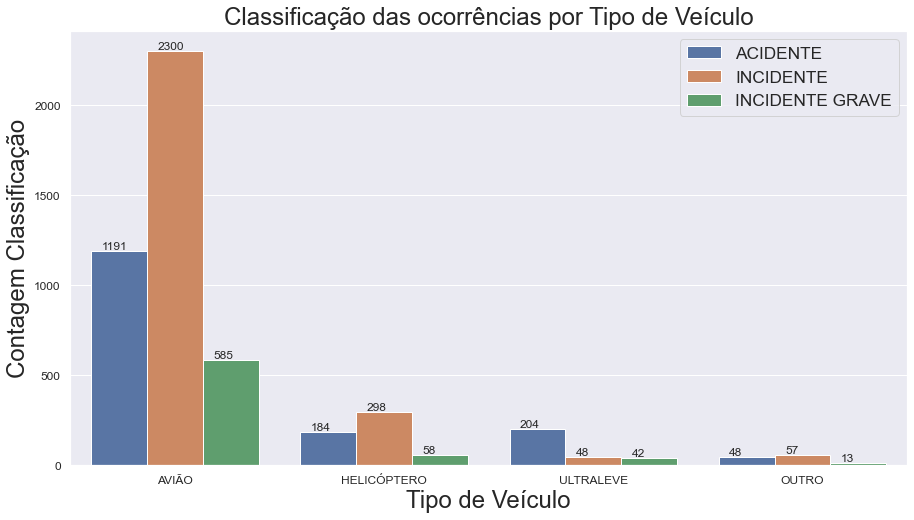

In [23]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=aeronaves_ocorrencias.aeronave_tipo_veiculo ,data=aeronaves_ocorrencias, hue=aeronaves_ocorrencias.ocorrencia_classificacao)
plt.legend(fontsize='x-large')
plt.xlabel("Tipo de Veículo")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências por Tipo de Veículo")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10))

## Panorama das ocorrências por Tipo de Veículo de acordo com cada ano

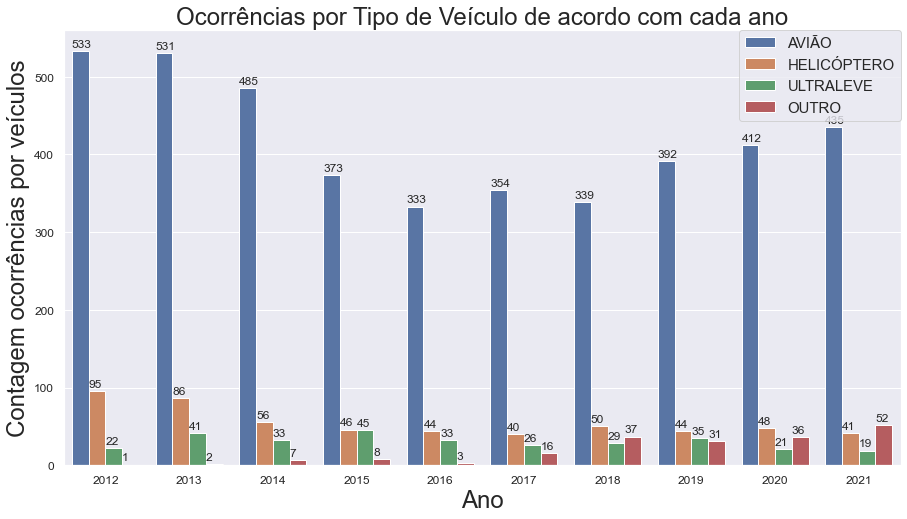

In [22]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=aeronaves_ocorrencias.Ano ,data=aeronaves_ocorrencias, hue=aeronaves_ocorrencias.aeronave_tipo_veiculo)
plt.legend(fontsize='x-large')
plt.xlabel("Ano")
plt.ylabel("Contagem ocorrências por veículos")
plt.title("Ocorrências por Tipo de Veículo de acordo com cada ano")
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., prop={'size': 15})

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()+5))

# Fabricantes das aeronaves

In [23]:
fabricantes = aeronaves_ocorrencias.aeronave_fabricante.value_counts().head(10)
fabricantes

CESSNA AIRCRAFT                837
NEIVA INDUSTRIA AERONAUTICA    583
EMBRAER                        582
PIPER AIRCRAFT                 381
***                            348
BOEING COMPANY                 266
BEECH AIRCRAFT                 254
AIRBUS INDUSTRIE               248
AEROSPATIALE AND ALENIA        247
AERO BOERO                     151
Name: aeronave_fabricante, dtype: int64

In [24]:
top10_fabricantes = aeronaves_ocorrencias.query('aeronave_fabricante in @fabricantes.index.tolist()')
top10_fabricantes

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,...,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,Dia,Mes,Ano
0,45331,PRTKB,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,REGULAR,...,45331,ACIDENTE,GUARULHOS,SP,SBGR,06/01/2012,13:44:00,6,1,2012
1,45332,PTUDD,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,ESPECIALIZADA,...,45332,ACIDENTE,VIAMÃO,RS,****,09/01/2012,13:30:00,9,1,2012
2,45333,PTGOO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,ESPECIALIZADA,...,45333,ACIDENTE,VIAMÃO,RS,****,06/01/2012,13:00:00,6,1,2012
3,45334,PRMHX,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,REGULAR,...,45334,INCIDENTE,BELÉM,PA,SBBE,08/01/2012,19:12:00,8,1,2012
4,45390,PTUEW,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,...,45390,ACIDENTE,CACHOEIRA DOURADA,GO,****,20/01/2012,21:00:00,20,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,80461,PRAQI,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,23000,REGULAR,...,80461,INCIDENTE,MARINGÁ,PR,SBMG,24/12/2021,03:30:00,24,12,2021
5230,80465,PRYRW,OUTRO,***,***,***,***,***,0,REGULAR,...,80465,INCIDENTE,VITÓRIA,ES,SBVT,21/12/2021,22:25:00,21,12,2021
5231,80467,PRGXM,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,REGULAR,...,80467,INCIDENTE,PETROLINA,PE,SBPL,31/12/2021,20:30:00,31,12,2021
5232,80468,PRGIH,AVIÃO,BOEING COMPANY,737-76N,B737,JATO,BIMOTOR,70080,REGULAR,...,80468,INCIDENTE,SALVADOR,BA,SBSV,26/12/2021,16:56:00,26,12,2021


In [25]:
fabricantes_aeronaves = top10_fabricantes.groupby(['aeronave_fabricante', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_fabricante', values=0)
fabricantes_aeronaves

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_fabricante,,,
***,185,114,49
AERO BOERO,44,61,46
AEROSPATIALE AND ALENIA,4,233,10
AIRBUS INDUSTRIE,7,230,11
BEECH AIRCRAFT,79,125,50
BOEING COMPANY,4,246,16
CESSNA AIRCRAFT,310,397,130
EMBRAER,109,408,65
NEIVA INDUSTRIA AERONAUTICA,308,166,109


## Panorama Ocorrências por fabricantes das aeronaves

<Figure size 1080x576 with 0 Axes>

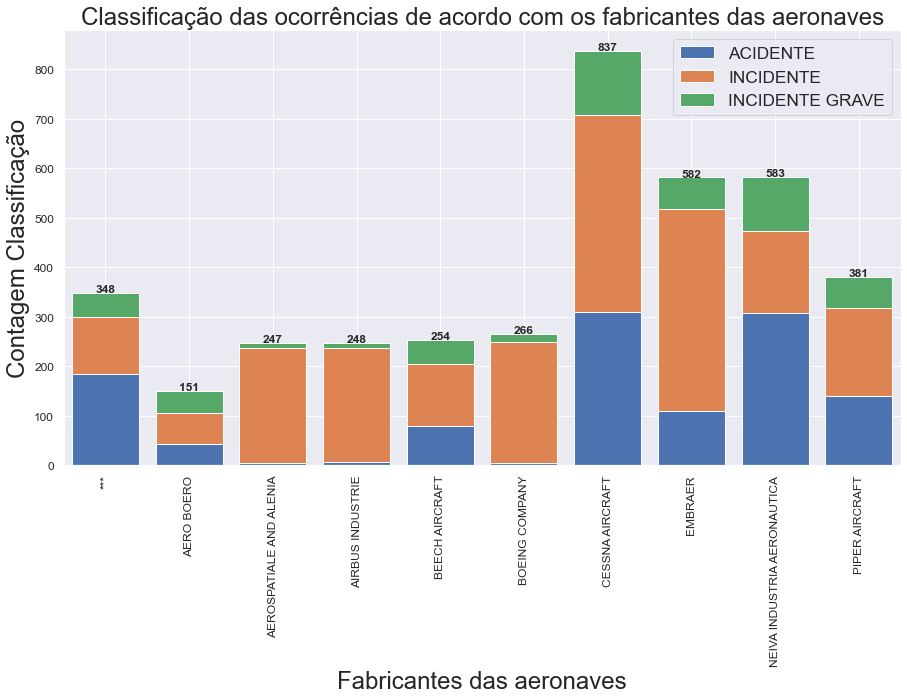

In [26]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = fabricantes_aeronaves.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Fabricantes das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com os fabricantes das aeronaves")
plt.xticks(rotation=90)

bottom = np.zeros(len(fabricantes_aeronaves))

for i, col in enumerate(fabricantes_aeronaves.columns):
    ax.bar(fabricantes_aeronaves.index, fabricantes_aeronaves[col], bottom=bottom, label=col)
    bottom += np.array(fabricantes_aeronaves[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = fabricantes_aeronaves.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

# Modelos das Aeronaves (nomenclatura ICAO)

In [27]:
modelos = aeronaves_ocorrencias.aeronave_tipo_icao.value_counts().head(10)
modelos

PA34    376
IPAN    295
ULAC    281
***     263
E190    229
AT72    202
A320    146
C152    137
AB11    132
AS50    119
Name: aeronave_tipo_icao, dtype: int64

In [28]:
top10_modelos = aeronaves_ocorrencias.query('aeronave_tipo_icao in @modelos.index.tolist()')
top10_modelos

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,...,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,Dia,Mes,Ano
1,45332,PTUDD,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,ESPECIALIZADA,...,45332,ACIDENTE,VIAMÃO,RS,****,09/01/2012,13:30:00,9,1,2012
2,45333,PTGOO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,ESPECIALIZADA,...,45333,ACIDENTE,VIAMÃO,RS,****,06/01/2012,13:00:00,6,1,2012
3,45334,PRMHX,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,REGULAR,...,45334,INCIDENTE,BELÉM,PA,SBBE,08/01/2012,19:12:00,8,1,2012
4,45390,PTUEW,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,...,45390,ACIDENTE,CACHOEIRA DOURADA,GO,****,20/01/2012,21:00:00,20,1,2012
8,45396,PRJMR,AVIÃO,PIPER AIRCRAFT,PA-34-220T,PA34,PISTÃO,BIMOTOR,2155,PARTICULAR,...,45396,INCIDENTE GRAVE,MARABÁ,PA,SBMA,11/01/2012,11:21:00,11,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,80455,PRFTE,AVIÃO,CESSNA AIRCRAFT,152,C152,PISTÃO,MONOMOTOR,757,INSTRUÇÃO,...,80455,INCIDENTE GRAVE,SANTA RITA,PB,*****,29/12/2021,18:50:00,29,12,2021
5225,80457,PPFLY,AVIÃO,AERO BOERO,AB-115,AB11,PISTÃO,MONOMOTOR,770,INSTRUÇÃO,...,80457,INCIDENTE GRAVE,NOVO HAMBURGO,RS,SSNH,31/12/2021,11:59:00,31,12,2021
5226,80458,PTWBA,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1800,PARTICULAR,...,80458,ACIDENTE,JATAÍ,GO,####,30/12/2021,20:30:00,30,12,2021
5228,80461,PRAQI,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,23000,REGULAR,...,80461,INCIDENTE,MARINGÁ,PR,SBMG,24/12/2021,03:30:00,24,12,2021


In [48]:
aeronave_modelo = top10_modelos.groupby(['aeronave_tipo_icao', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_tipo_icao', values=0)
aeronave_modelo = aeronave_modelo.fillna(0)
aeronave_modelo

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_tipo_icao,,,
***,93.0,143.0,27.0
A320,2.0,136.0,8.0
AB11,37.0,57.0,38.0
AS50,39.0,64.0,16.0
AT72,0.0,193.0,9.0
C152,27.0,90.0,20.0
E190,0.0,223.0,6.0
IPAN,240.0,11.0,44.0
PA34,77.0,224.0,75.0


## Panorama Ocorrências por modelos das aeronaves

<Figure size 1080x576 with 0 Axes>

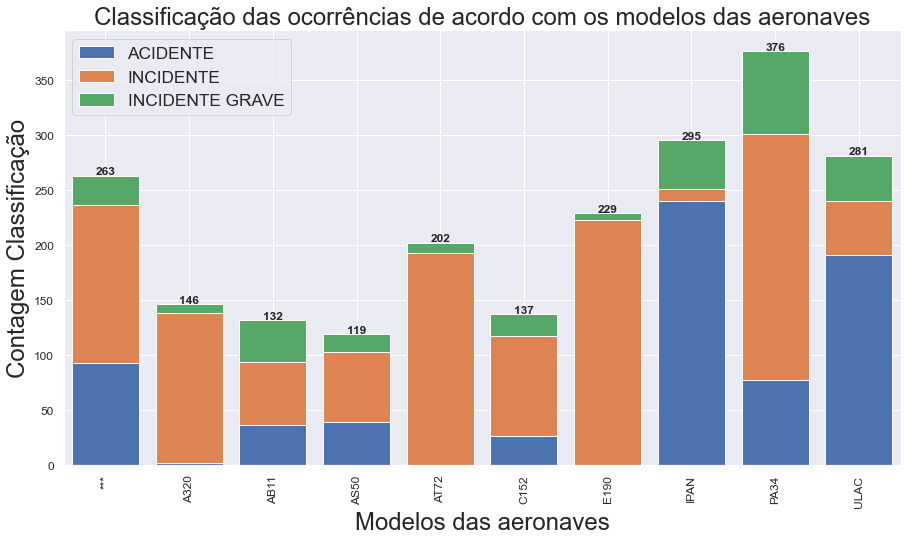

In [49]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = aeronave_modelo.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Modelos das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com os modelos das aeronaves")
plt.xticks(rotation=90)

bottom = np.zeros(len(aeronave_modelo))

for i, col in enumerate(aeronave_modelo.columns):
    ax.bar(aeronave_modelo.index, aeronave_modelo[col], bottom=bottom, label=col)
    bottom += np.array(aeronave_modelo[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = aeronave_modelo.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

# Tipo de Motor das Aeronaves

In [32]:
motor = aeronaves_ocorrencias.aeronave_motor_tipo.value_counts()
motor

PISTÃO        2883
JATO           967
TURBOÉLICE     664
TURBOEIXO      471
***            227
SEM TRAÇÃO      17
Name: aeronave_motor_tipo, dtype: int64

In [34]:
aeronave_motor = aeronaves_ocorrencias.groupby(['aeronave_motor_tipo', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_motor_tipo', values=0)
aeronave_motor

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_motor_tipo,,,
***,77,123,27
JATO,33,876,58
PISTÃO,1347,1031,505
SEM TRAÇÃO,11,3,3
TURBOEIXO,94,327,50
TURBOÉLICE,114,481,69


## Panorama Ocorrências por motores das aeronaves


<Figure size 1080x576 with 0 Axes>

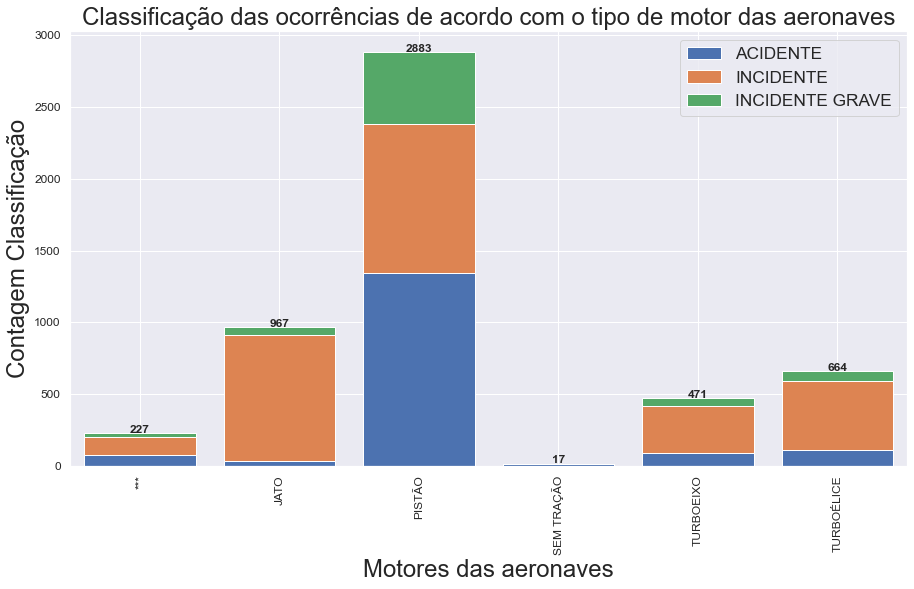

In [35]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = aeronave_motor.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Motores das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com o tipo de motor das aeronaves")
plt.xticks(rotation=90)

bottom = np.zeros(len(aeronave_motor))

for i, col in enumerate(aeronave_motor.columns):
    ax.bar(aeronave_motor.index, aeronave_motor[col], bottom=bottom, label=col)
    bottom += np.array(aeronave_motor[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = aeronave_motor.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

# Quantidade de Motores da Aeronave

In [39]:
quantidade_motor = aeronaves_ocorrencias.aeronave_motor_quantidade.value_counts()
quantidade_motor

MONOMOTOR      2672
BIMOTOR        2230
SEM TRAÇÃO      167
***              92
TRIMOTOR         68
QUADRIMOTOR       5
Name: aeronave_motor_quantidade, dtype: int64

In [41]:
aeronave_quantidade_motor = aeronaves_ocorrencias.groupby(['aeronave_motor_quantidade', 'ocorrencia_classificacao']).size().reset_index().pivot(columns='ocorrencia_classificacao', index='aeronave_motor_quantidade', values=0)
aeronave_quantidade_motor = aeronave_quantidade_motor.fillna(0)
aeronave_quantidade_motor

ocorrencia_classificacao,ACIDENTE,INCIDENTE,INCIDENTE GRAVE
aeronave_motor_quantidade,,,
***,34.0,52.0,6.0
BIMOTOR,239.0,1747.0,244.0
MONOMOTOR,1343.0,893.0,436.0
QUADRIMOTOR,0.0,5.0,0.0
SEM TRAÇÃO,61.0,81.0,25.0
TRIMOTOR,1.0,66.0,1.0


## Panorama Ocorrências por quantidade de motores das aeronaves


<Figure size 1080x576 with 0 Axes>

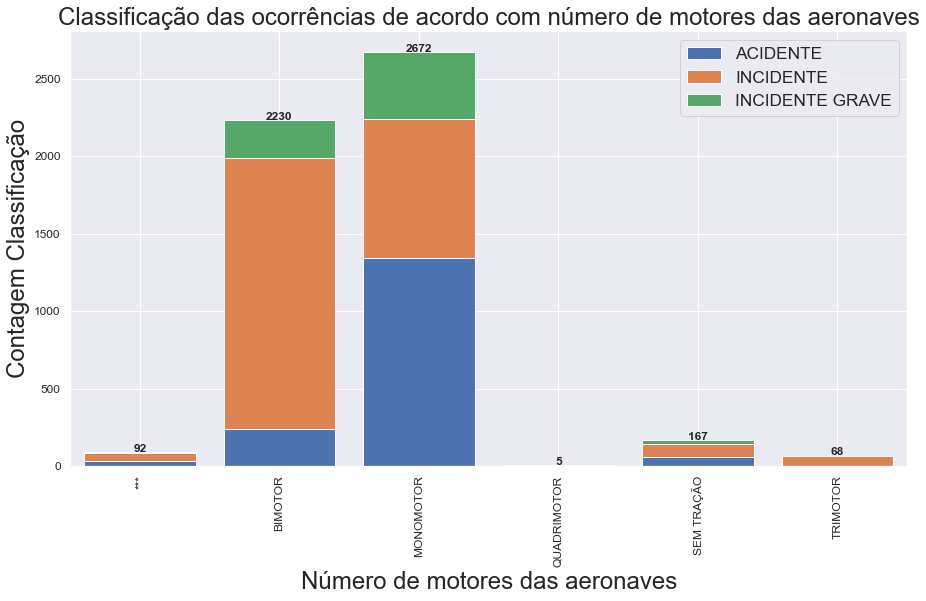

In [42]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = aeronave_quantidade_motor.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.legend(fontsize='x-large')
plt.xlabel("Número de motores das aeronaves")
plt.ylabel("Contagem Classificação")
plt.title("Classificação das ocorrências de acordo com número de motores das aeronaves")
plt.xticks(rotation=90)

bottom = np.zeros(len(aeronave_quantidade_motor))

for i, col in enumerate(aeronave_quantidade_motor.columns):
    ax.bar(aeronave_quantidade_motor.index, aeronave_quantidade_motor[col], bottom=bottom, label=col)
    bottom += np.array(aeronave_quantidade_motor[col])

# Somando as linhas dos dados para obter o valor total de cada barra.
totals = aeronave_quantidade_motor.sum(axis=1)

# Add labels to each bar.
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + 1, round(total), ha='center',
          weight='bold')

plt.show()

# Analisando fatalidades

In [58]:
fatalidades = aeronaves_ocorrencias.loc[aeronaves_ocorrencias['aeronave_fatalidades_total'] != 0]
aeronaves_ocorrencias.loc[aeronaves_ocorrencias['aeronave_fatalidades_total'] != 0]

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_registro_segmento,...,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,Dia,Mes,Ano
15,45408,PTGQT,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,...,45408,ACIDENTE,ELDORADO,SP,****,11/01/2012,13:45:00,11,1,2012
16,45409,PRRGF,AVIÃO,BEECH AIRCRAFT,A36,BE36,PISTÃO,MONOMOTOR,1633,PARTICULAR,...,45409,ACIDENTE,CÁCERES,MT,****,14/01/2012,10:00:00,14,1,2012
18,45412,PTUDH,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,...,45412,ACIDENTE,TASSO FRAGOSO,MA,****,23/01/2012,09:33:00,23,1,2012
19,45413,PPXRB,AVIÃO,***,ACROBATA,ZZZZ,PISTÃO,MONOMOTOR,1467,EXPERIMENTAL,...,45413,ACIDENTE,ITAPURANGA,GO,****,25/01/2012,22:00:00,25,1,2012
27,45487,PTLOU,AVIÃO,BEECH AIRCRAFT,95-B55,BE55,PISTÃO,BIMOTOR,2268,TÁXI AÉREO,...,45487,ACIDENTE,CAMETÁ,PA,****,16/02/2012,12:30:00,16,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,80383,PTGRQ,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,AGRÍCOLA,...,80383,ACIDENTE,LAGOA DA CONFUSÃO,TO,****,11/11/2021,12:40:00,11,11,2021
5170,80398,PTFFD,AVIÃO,CESSNA AIRCRAFT,A188B,C188,PISTÃO,MONOMOTOR,1497,AGRÍCOLA,...,80398,ACIDENTE,JOÃO PINHEIRO,MG,****,24/11/2021,11:40:00,24,11,2021
5177,80406,PPWRS,AVIÃO,PIPER AIRCRAFT,PA-34-220T,PA34,PISTÃO,BIMOTOR,2155,PARTICULAR,...,80406,ACIDENTE,UBATUBA,SP,****,25/11/2021,00:27:00,25,11,2021
5186,80415,PTUBV,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1550,PARTICULAR,...,80415,ACIDENTE,SÃO FÉLIX DO XINGU,PA,****,03/12/2021,20:00:00,3,12,2021


In [57]:
dicts = {}
for i in range(0,11):
    keys = 2012 + i
    filter_fatalidades = fatalidades.loc[fatalidades['Ano'] == 2012 + i]
    values = sum(filter_fatalidades['aeronave_fatalidades_total'])
    dicts[keys] = values

print(dicts)

{2012: 110, 2013: 94, 2014: 80, 2015: 79, 2016: 104, 2017: 54, 2018: 77, 2019: 63, 2020: 50, 2021: 57, 2022: 0}


## Panorama das fatalidades nas aeronaves de acordo com cada ano


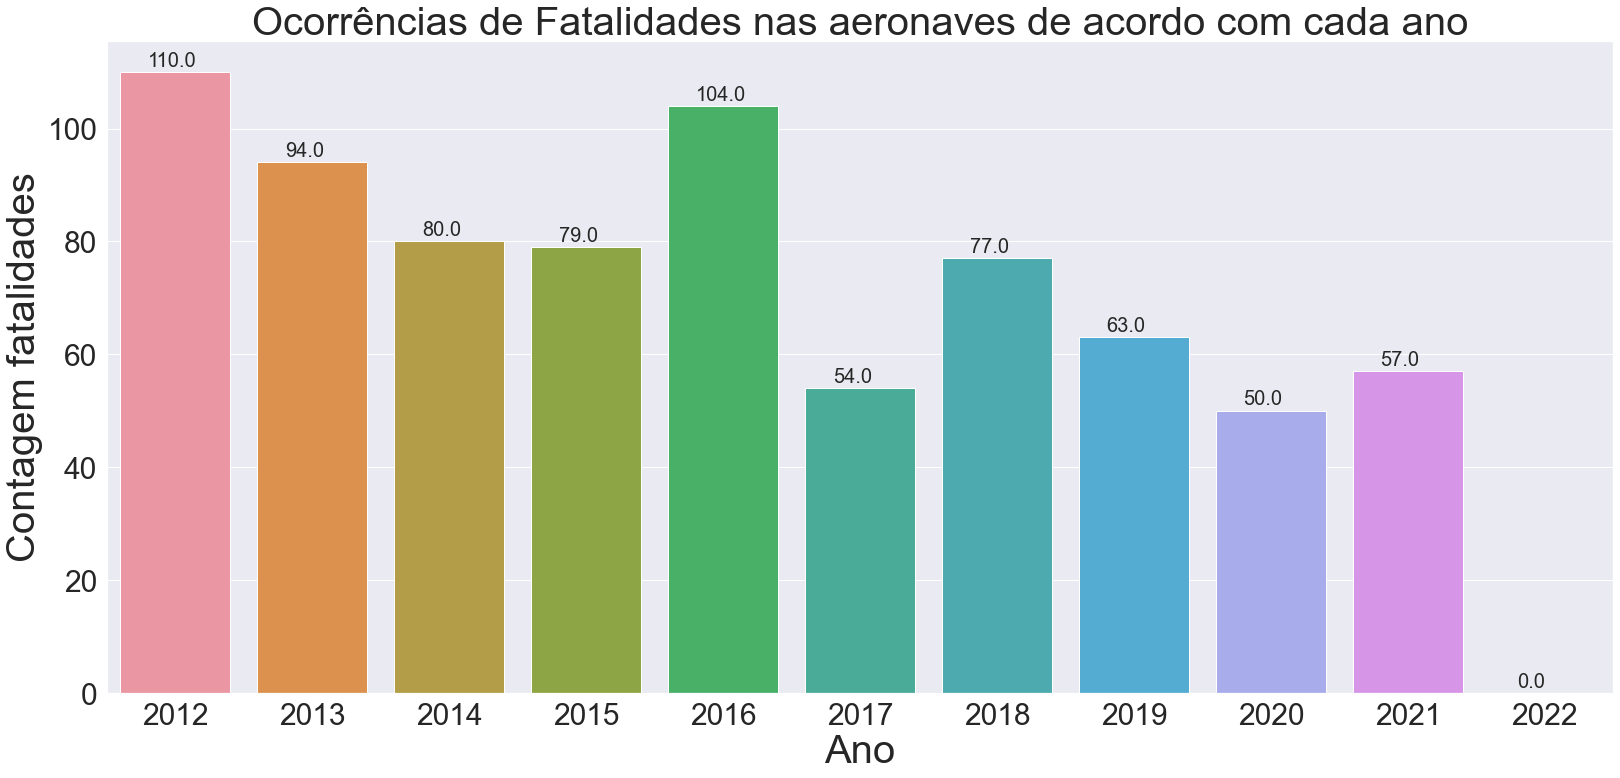

In [59]:
fig = plt.figure(figsize=(27,12))
fig.subplots_adjust(hspace=0.2, wspace=0.2)


my_df = pd.DataFrame(dicts.items())
ax = sns.barplot(x=0, y=1, data=my_df)

plt.xlabel("Ano", fontsize = 40)
plt.ylabel("Contagem fatalidades", fontsize = 40)
plt.title("Ocorrências de Fatalidades nas aeronaves de acordo com cada ano", fontsize = 40)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+1), fontsize = 20)

# Ano de Fabricação das Aeronaves

In [75]:
ano_fabricacao = aeronaves_ocorrencias[aeronaves_ocorrencias['aeronave_ano_fabricacao'].notna()]
ano_fabricacao

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_ano_fabricacao,...,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,Dia,Mes,Ano
0,45331,PRTKB,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,2001.0,...,45331,ACIDENTE,GUARULHOS,SP,SBGR,06/01/2012,13:44:00,6,1,2012
1,45332,PTUDD,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,1987.0,...,45332,ACIDENTE,VIAMÃO,RS,****,09/01/2012,13:30:00,9,1,2012
2,45333,PTGOO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201,IPAN,PISTÃO,MONOMOTOR,1800,1976.0,...,45333,ACIDENTE,VIAMÃO,RS,****,06/01/2012,13:00:00,6,1,2012
3,45334,PRMHX,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,2008.0,...,45334,INCIDENTE,BELÉM,PA,SBBE,08/01/2012,19:12:00,8,1,2012
4,45390,PTUEW,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,1989.0,...,45390,ACIDENTE,CACHOEIRA DOURADA,GO,****,20/01/2012,21:00:00,20,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,80461,PRAQI,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,23000,2013.0,...,80461,INCIDENTE,MARINGÁ,PR,SBMG,24/12/2021,03:30:00,24,12,2021
5024,80463,PRHMB,AVIÃO,CIRRUS DESIGN,SR22,SR22,PISTÃO,MONOMOTOR,1542,2004.0,...,80463,INCIDENTE,MARINGÁ,PR,SBMG,28/12/2021,16:11:00,28,12,2021
5025,80467,PRGXM,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,2013.0,...,80467,INCIDENTE,PETROLINA,PE,SBPL,31/12/2021,20:30:00,31,12,2021
5026,80468,PRGIH,AVIÃO,BOEING COMPANY,737-76N,B737,JATO,BIMOTOR,70080,2004.0,...,80468,INCIDENTE,SALVADOR,BA,SBSV,26/12/2021,16:56:00,26,12,2021


In [80]:
top10_ano_fabricacao = ano_fabricacao.aeronave_ano_fabricacao.value_counts().head(11)
top10_ano_fabricacao

0.0       300
2012.0    249
2011.0    228
2010.0    225
2009.0    198
2008.0    188
1980.0    173
2007.0    168
2013.0    160
1979.0    137
1977.0    128
Name: aeronave_ano_fabricacao, dtype: int64

In [81]:
top10_ano_fabricacao = top10_ano_fabricacao.index.tolist()[1:]
top10_ano_fabricacao

[2012.0,
 2011.0,
 2010.0,
 2009.0,
 2008.0,
 1980.0,
 2007.0,
 2013.0,
 1979.0,
 1977.0]

In [84]:
top10_ano_fabricacao = aeronaves_ocorrencias.query('aeronave_ano_fabricacao in @top10_ano_fabricacao')
top10_ano_fabricacao

,codigo_ocorrencia2,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_ano_fabricacao,...,codigo_ocorrencia1,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,Dia,Mes,Ano
3,45334,PRMHX,AVIÃO,AIRBUS INDUSTRIE,A320-214,A320,JATO,BIMOTOR,77000,2008.0,...,45334,INCIDENTE,BELÉM,PA,SBBE,08/01/2012,19:12:00,8,1,2012
10,45399,PTEOT,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-720C,PA32,PISTÃO,MONOMOTOR,1542,1977.0,...,45399,INCIDENTE GRAVE,MUANÁ,PA,****,18/01/2012,17:35:00,18,1,2012
12,45401,PUUSS,ULTRALEVE,***,P2004 BRAVO,ULAC,PISTÃO,MONOMOTOR,580,2007.0,...,45401,ACIDENTE,SÃO SEBASTIÃO,SP,****,06/01/2012,17:00:00,6,1,2012
15,45408,PTGQT,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-201A,IPAN,PISTÃO,MONOMOTOR,1800,1977.0,...,45408,ACIDENTE,ELDORADO,SP,****,11/01/2012,13:45:00,11,1,2012
19,45413,PPXRB,AVIÃO,***,ACROBATA,ZZZZ,PISTÃO,MONOMOTOR,1467,2007.0,...,45413,ACIDENTE,ITAPURANGA,GO,****,25/01/2012,22:00:00,25,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,80456,PPAFP,AVIÃO,CESSNA AIRCRAFT,208B,C208,TURBOÉLICE,MONOMOTOR,3969,2013.0,...,80456,INCIDENTE,SÃO PAULO,SP,SBSP,30/12/2021,13:15:00,30,12,2021
5021,80458,PTWBA,AVIÃO,EMBRAER,EMB-202A,IPAN,PISTÃO,MONOMOTOR,1800,2013.0,...,80458,ACIDENTE,JATAÍ,GO,####,30/12/2021,20:30:00,30,12,2021
5023,80461,PRAQI,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,23000,2013.0,...,80461,INCIDENTE,MARINGÁ,PR,SBMG,24/12/2021,03:30:00,24,12,2021
5025,80467,PRGXM,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,2013.0,...,80467,INCIDENTE,PETROLINA,PE,SBPL,31/12/2021,20:30:00,31,12,2021


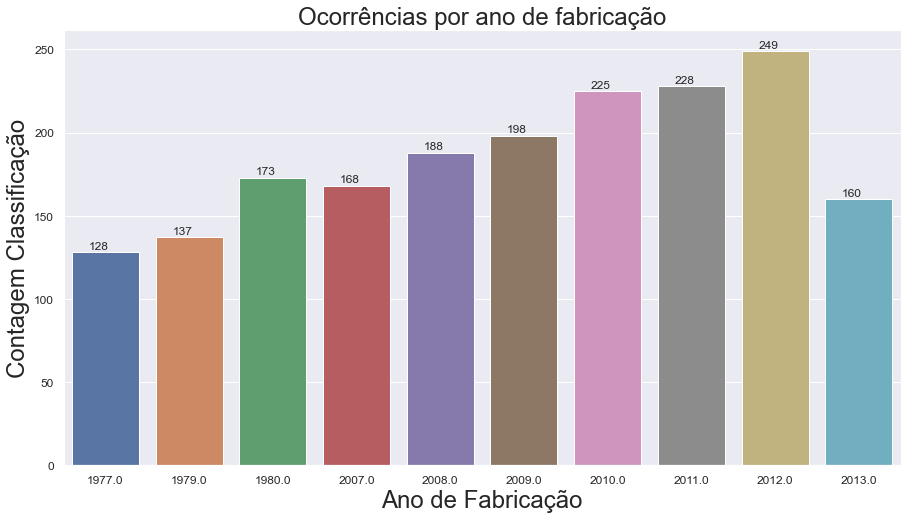

In [87]:
plt.figure(figsize = (15,8))

rc={'font.size': 12, 'axes.labelsize': 24, 'legend.fontsize': 40, 
    'axes.titlesize': 24, 'xtick.labelsize': 12, 'ytick.labelsize': 12}

sns.set(rc=rc)

ax = sns.countplot(x=top10_ano_fabricacao.aeronave_ano_fabricacao ,data=top10_ano_fabricacao)
plt.xlabel("Ano de Fabricação")
plt.ylabel("Contagem Classificação")
plt.title("Ocorrências por ano de fabricação")

for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+2))